## Observations and Insights 
The Capomulin & Ramicane were the most effective treatments, producing similar results.  These two drugs were much more effective than Infubinol & Ceftamine, as evidenced by the boxplot results.
The heavier the mouse, the larger the tumor volume and therefore the less effective the Capomulin (see scatter plot & linear regression).
Examining a sample mouse treated with Capomulin showcased the effectiveness of the drug in shrinking tumor volume over the course of the study.

In [58]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress
from sklearn import datasets

In [59]:
# read mouse data file into df
mouse_metadata_path = "data/Mouse_metadata.csv"
mouse_metadata = pd.read_csv(mouse_metadata_path)
mouse_metadata.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16


In [60]:
# read the study results into df
study_results_path = "data/Study_results.csv"
study_results = pd.read_csv(study_results_path)
study_results.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [61]:
# Combine the data into a single dataset
master_data = pd.merge(mouse_metadata, study_results, on="Mouse ID", how="outer")
# Display the data table for preview
master_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [62]:
# Checking the number of mice.
mice = master_data['Mouse ID'].value_counts()
number_of_mice = len(mice)
number_of_mice

249

In [63]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_ID = master_data.loc[master_data.duplicated(subset=['Mouse ID','Timepoint']),'Mouse ID'].unique()
duplicate_ID

array(['g989'], dtype=object)

In [64]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicates = master_data.loc[master_data["Mouse ID"]=='g989',:]
duplicates = master_data[master_data.duplicated(['Mouse ID','Timepoint'])]
duplicates

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [65]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_data = master_data.loc[master_data['Mouse ID'].isin(duplicate_ID) == False]
clean_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [66]:
# Checking the number of mice in the clean DataFrame.
clean_mice = clean_data['Mouse ID'].value_counts()
new_mice = len(clean_mice)
new_mice

248

## Summary Statistics

In [67]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 

# mean, median, variance, standard deviation, and SEM of the tumor volume. 
TV_mean = clean_data["Tumor Volume (mm3)"].groupby(clean_data["Drug Regimen"]).mean()
TV_median = clean_data["Tumor Volume (mm3)"].groupby(clean_data["Drug Regimen"]).median()
TV_variance = clean_data["Tumor Volume (mm3)"].groupby(clean_data["Drug Regimen"]).var()
TV_sd = clean_data["Tumor Volume (mm3)"].groupby(clean_data["Drug Regimen"]).std()
TV_sem = clean_data["Tumor Volume (mm3)"].groupby(clean_data["Drug Regimen"]).sem()

# Assemble the resulting series into a single summary dataframe.
summary_stats = pd.DataFrame({"Mean TV":TV_mean,
                  "Median TV":TV_median,
                  "Variance TV":TV_variance,
                  "Standard Deviation TV":TV_sd,
                  "SEM TV":TV_sem})
summary_stats

,Mean TV,Median TV,Variance TV,Standard Deviation TV,SEM TV
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [68]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
# group_df.agg(['mean', 'median', 'var', 'std', 'sem'])

## Bar and Pie Charts

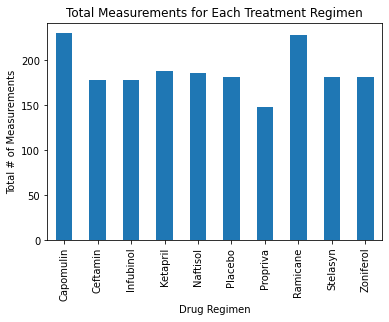

<Figure size 432x288 with 0 Axes>

In [70]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.

regimen_group = clean_data.groupby("Drug Regimen")
regimen_counts = regimen_group['Drug Regimen'].count()
regimen_bar = regimen_counts.plot(kind='bar')
regimen_bar.set_title("Total Measurements for Each Treatment Regimen")
regimen_bar.set_xlabel("Drug Regimen")
regimen_bar.set_ylabel("Total # of Measurements")
plt.savefig("./Analysis/BarPandas.png")
plt.show()
plt.tight_layout()

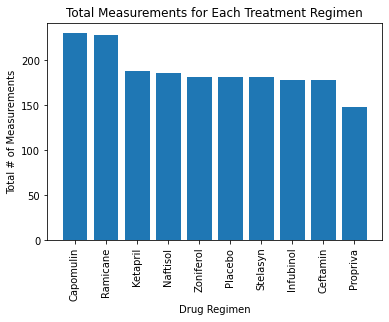

<Figure size 432x288 with 0 Axes>

In [71]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.
regimen_data = clean_data["Drug Regimen"].value_counts()
x_axis = np.arange(len(regimen_data))
plt.bar(x_axis, regimen_data)
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, regimen_data.index.values, rotation=90)
plt.title("Total Measurements for Each Treatment Regimen")
plt.ylabel("Total # of Measurements")
plt.xlabel("Drug Regimen")
plt.savefig("./Analysis/BarPyplot.png")
plt.show()
plt.tight_layout()

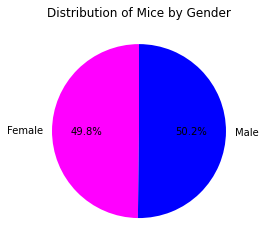

In [72]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
# DataFrame.plot()

gender_groups = mouse_metadata.groupby('Sex')
gender_count = gender_groups['Mouse ID'].count()
gender_pie = gender_count.plot(kind="pie", autopct="%1.1f%%", startangle=90, colors=["fuchsia", "blue"])
gender_pie.set_title("Distribution of Mice by Gender")
gender_pie.set_ylabel('')
plt.savefig("./Analysis/GenderPiePandas.png")
plt.show()

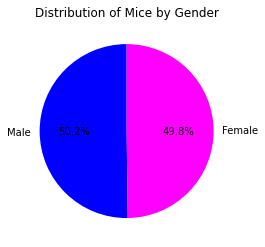

In [73]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
gender_breakdown = mouse_metadata["Sex"].value_counts()
plt.pie(gender_breakdown, labels=gender_breakdown.index.values, autopct="%1.1f%%", startangle=90, colors=["blue", "fuchsia"]) 
plt.title("Distribution of Mice by Gender")
plt.savefig("./Analysis/GenderPiePyplot.png")

## Quartiles, Outliers and Boxplots

In [74]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Start by getting the last (greatest) timepoint for each mouse
max_timepoint = pd.DataFrame(clean_data.groupby("Mouse ID")["Timepoint"].max())
max_timepoint = max_timepoint.rename(columns={"Timepoint":"Max Timepoint"})
max_timepoint

,Max Timepoint
Mouse ID,
a203,45
a251,45
a262,45
a275,45
a366,30
...,...
z435,10
z578,45
z581,45


In [75]:
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
max_merge = pd.merge(clean_data, max_timepoint, how='right', on='Mouse ID')
max_merge = max_merge.loc[max_merge['Timepoint']==max_merge['Max Timepoint']]
max_merge.head(10)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,Max Timepoint
9,a203,Infubinol,Female,20,23,45,67.973419,2,45
19,a251,Infubinol,Female,21,25,45,65.525743,1,45
29,a262,Placebo,Female,17,29,45,70.717621,4,45
39,a275,Ceftamin,Female,20,28,45,62.999356,3,45
46,a366,Stelasyn,Female,16,29,30,63.440686,1,30
56,a401,Zoniferol,Female,8,25,45,66.794156,4,45
66,a411,Ramicane,Male,3,22,45,38.407618,1,45
76,a444,Ramicane,Female,10,25,45,43.047543,0,45
79,a457,Ketapril,Female,11,30,10,49.783419,0,10
89,a492,Stelasyn,Male,20,25,45,60.122011,1,45


In [76]:
# Capomulin
cap = pd.DataFrame(max_merge.loc[max_merge["Drug Regimen"]=="Capomulin"].set_index("Mouse ID"))
cap.head(5)

,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,Max Timepoint
Mouse ID,,,,,,,,
b128,Capomulin,Female,9,22,45,38.982878,2,45
b742,Capomulin,Male,7,21,45,38.939633,0,45
f966,Capomulin,Male,16,17,20,30.485985,0,20
g288,Capomulin,Male,3,19,45,37.074024,1,45
g316,Capomulin,Female,22,22,45,40.159220,2,45


In [77]:
# quartiles
# SEE DAY 3, ACTIVITY 3 UNSOLVED
quartiles = cap['Tumor Volume (mm3)'].quantile([.25,.5,.75])
lowQ = quartiles[0.25]
highQ = quartiles[0.75]
medQ = quartiles[0.5]
iqr = highQ-lowQ

print(f'Capomulin Results:')
print(f'The lower quartile of tumor volume is {lowQ}.')
print(f'The higher quartile of tumor volume is {highQ}.')
print(f'The interquartile of tumor volume is {iqr}.')
print(f'The median tumor volume is {medQ}.')

low_out = lowQ - (1.5*iqr)
high_out = highQ + (1.5*iqr)

print(f'Values below {low_out} could be outliers.')
print(f'Values above {high_out} could be outliers.')

Capomulin Results:
The lower quartile of tumor volume is 32.37735684.
The higher quartile of tumor volume is 40.1592203.
The interquartile of tumor volume is 7.781863460000004.
The median tumor volume is 38.125164399999996.
Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers.


In [78]:
# Ramicane
ram = pd.DataFrame(max_merge.loc[max_merge["Drug Regimen"]=="Ramicane"].set_index("Mouse ID"))
ram.head(5)

,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,Max Timepoint
Mouse ID,,,,,,,,
a411,Ramicane,Male,3,22,45,38.407618,1,45
a444,Ramicane,Female,10,25,45,43.047543,0,45
a520,Ramicane,Male,13,21,45,38.810366,1,45
a644,Ramicane,Female,7,17,45,32.978522,1,45
c458,Ramicane,Female,23,20,30,38.342008,2,30


In [79]:
quartiles = ram['Tumor Volume (mm3)'].quantile([.25,.5,.75])
lowQ = quartiles[0.25]
highQ = quartiles[0.75]
medQ = quartiles[0.5]
iqr = highQ-lowQ

print(f'Ramicane Results:')
print(f'The lower quartile of tumor volume is {lowQ}.')
print(f'The higher quartile of tumor volume is {highQ}.')
print(f'The interquartile of tumor volume is {iqr}.')
print(f'The median tumor volume is {medQ}.')

low_out = lowQ - (1.5*iqr)
high_out = highQ + (1.5*iqr)

print(f'Values below {low_out} could be outliers.')
print(f'Values above {high_out} could be outliers.')

Ramicane Results:
The lower quartile of tumor volume is 31.56046955.
The higher quartile of tumor volume is 40.65900627.
The interquartile of tumor volume is 9.098536719999998.
The median tumor volume is 36.56165229.
Values below 17.912664470000003 could be outliers.
Values above 54.30681135 could be outliers.


In [80]:
# Infubinol
infub = pd.DataFrame(max_merge.loc[max_merge["Drug Regimen"]=="Infubinol"].set_index("Mouse ID"))
infub.head(5)

,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,Max Timepoint
Mouse ID,,,,,,,,
a203,Infubinol,Female,20,23,45,67.973419,2,45
a251,Infubinol,Female,21,25,45,65.525743,1,45
a577,Infubinol,Female,6,25,30,57.031862,2,30
a685,Infubinol,Male,8,30,45,66.083066,3,45
c139,Infubinol,Male,11,28,45,72.226731,2,45


In [81]:
quartiles = infub['Tumor Volume (mm3)'].quantile([.25,.5,.75])
lowQ = quartiles[0.25]
highQ = quartiles[0.75]
medQ = quartiles[0.5]
iqr = highQ-lowQ

print(f'Infubinol Results:')
print(f'The lower quartile of tumor volume is {lowQ}.')
print(f'The higher quartile of tumor volume is {highQ}.')
print(f'The interquartile of tumor volume is {iqr}.')
print(f'The median tumor volume is {medQ}.')

low_out = lowQ - (1.5*iqr)
high_out = highQ + (1.5*iqr)

print(f'Values below {low_out} could be outliers.')
print(f'Values above {high_out} could be outliers.')

Infubinol Results:
The lower quartile of tumor volume is 54.04860769.
The higher quartile of tumor volume is 65.52574285.
The interquartile of tumor volume is 11.477135160000003.
The median tumor volume is 60.16518046.
Values below 36.83290494999999 could be outliers.
Values above 82.74144559000001 could be outliers.


In [82]:
# Ceftamin
ceft = pd.DataFrame(max_merge.loc[max_merge["Drug Regimen"]=="Ceftamin"].set_index("Mouse ID"))
ceft.head(5)

,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,Max Timepoint
Mouse ID,,,,,,,,
a275,Ceftamin,Female,20,28,45,62.999356,3,45
b447,Ceftamin,Male,2,30,0,45.000000,0,0
b487,Ceftamin,Female,6,28,25,56.057749,1,25
b759,Ceftamin,Female,12,25,30,55.742829,1,30
f436,Ceftamin,Female,3,25,15,48.722078,2,15


In [83]:
quartiles = ceft['Tumor Volume (mm3)'].quantile([.25,.5,.75])
lowQ = quartiles[0.25]
highQ = quartiles[0.75]
medQ = quartiles[0.5]
iqr = highQ-lowQ

print(f'Ceftamin Results:')
print(f'The lower quartile of tumor volume is {lowQ}.')
print(f'The higher quartile of tumor volume is {highQ}.')
print(f'The interquartile of tumor volume is {iqr}.')
print(f'The median tumor volume is {medQ}.')

low_out = lowQ - (1.5*iqr)
high_out = highQ + (1.5*iqr)

print(f'Values below {low_out} could be outliers.')
print(f'Values above {high_out} could be outliers.')

Ceftamin Results:
The lower quartile of tumor volume is 48.72207785.
The higher quartile of tumor volume is 64.29983003.
The interquartile of tumor volume is 15.577752179999997.
The median tumor volume is 59.85195552.
Values below 25.355449580000002 could be outliers.
Values above 87.66645829999999 could be outliers.


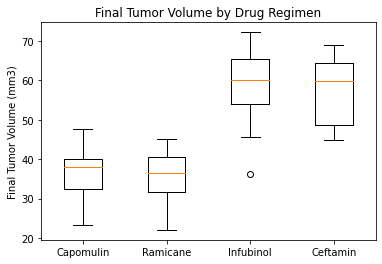

In [84]:
# extract tumor volumes from each of the 4 dataframes to be plotted
cap_tumors = cap["Tumor Volume (mm3)"]
ram_tumors = ram["Tumor Volume (mm3)"]
infub_tumors = infub["Tumor Volume (mm3)"]
ceft_tumors = ceft["Tumor Volume (mm3)"]

# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
boxplot_data = [cap_tumors, ram_tumors, infub_tumors, ceft_tumors]
fig1, ax1 = plt.subplots()
ax1.set_title('Final Tumor Volume by Drug Regimen')
ax1.set_ylabel('Final Tumor Volume (mm3)')
ax1.boxplot(boxplot_data, labels=['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin'])
plt.savefig("./Analysis/BoxPlot.png")
plt.show()

## Line and Scatter Plots

<function matplotlib.pyplot.show(close=None, block=None)>

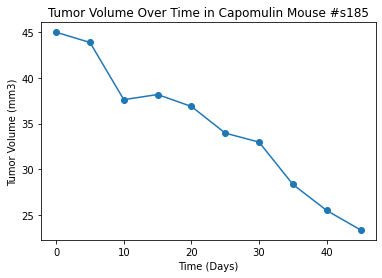

In [85]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
cap_mouse = clean_data.loc[clean_data["Mouse ID"]=="s185"]
plt.plot(cap_mouse["Timepoint"], cap_mouse["Tumor Volume (mm3)"], marker='o')
plt.xlabel("Time (Days)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Tumor Volume Over Time in Capomulin Mouse #s185")
plt.savefig("./Analysis/LinePlot.png")
plt.show


In [38]:
# Generate Capomulin DataFrame for Scatter Plot & Linear Regression
cap_master = pd.DataFrame(clean_data.loc[clean_data["Drug Regimen"]=="Capomulin"].set_index("Mouse ID"))
cap_filtered = cap_master[["Drug Regimen", "Weight (g)", "Tumor Volume (mm3)"]]
#cap_filtered.head()
#cap_avg = cap_filtered.groupby(["Mouse ID"]).mean()
cap_avg.head(10)

,Weight (g),Tumor Volume (mm3)
Mouse ID,,
b128,22,41.963636
b742,21,40.083699
f966,17,36.505973
g288,19,41.990097
g316,22,44.613344
i557,24,44.805810
i738,20,39.141053
j119,23,44.465236
j246,21,43.216925


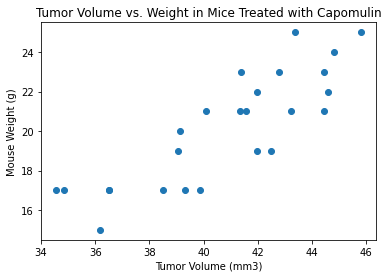

In [86]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
x_values = cap_avg["Tumor Volume (mm3)"]
y_values = cap_avg["Weight (g)"]
plt.scatter(x_values,y_values)
plt.xlabel("Tumor Volume (mm3)")
plt.ylabel("Mouse Weight (g)")
plt.title("Tumor Volume vs. Weight in Mice Treated with Capomulin")
plt.savefig("./Analysis/ScatterPlot.png")
plt.show()

## Correlation and Regression

In [37]:
# Calculate the correlation coefficient for mouse weight and average tumor volume for the Capomulin regimen
# I have no idea why this is coming up with an error!
weight = cap_avg.loc['Weight (g)']
volume = cap_avg.loc['Tumor Volume (mm3)']
correlation = st.pearsonr(weight,volume)
correlation

print(f'The correlation between mouse weight & tumor volume is {round(correlation[0],2)}")

KeyError: 'Weight (g)'

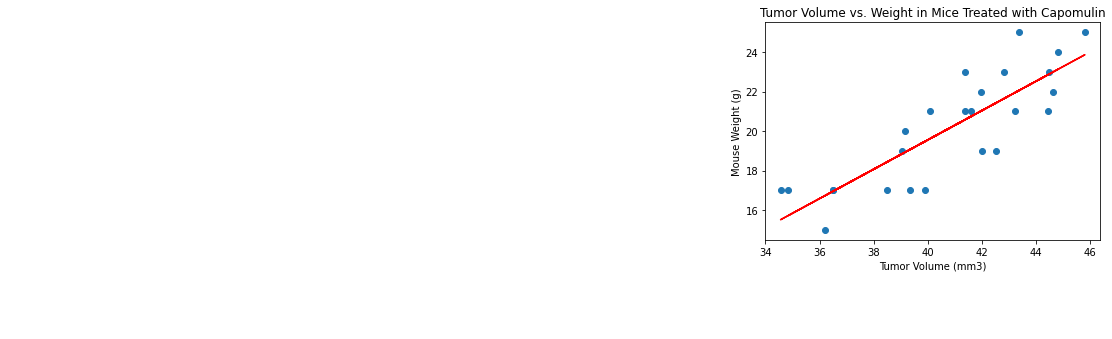

The r-squared is: 0.7088568047708717


In [87]:
# linear regression for mouse weight and average tumor volume for the Capomulin regimen
x_values = cap_avg["Tumor Volume (mm3)"]
y_values = cap_avg["Weight (g)"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel("Tumor Volume (mm3)")
plt.ylabel("Mouse Weight (g)")
plt.title("Tumor Volume vs. Weight in Mice Treated with Capomulin")
plt.savefig("./Analysis/LinearRegression.png")
plt.show()
print(f"The r-squared is: {rvalue**2}")